# KNN - K-Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# df.iloc[:20].style.background_gradient(cmap="viridis") # jinja2 hatası 

In [4]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.corr(numeric_only=True)

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<Axes: >

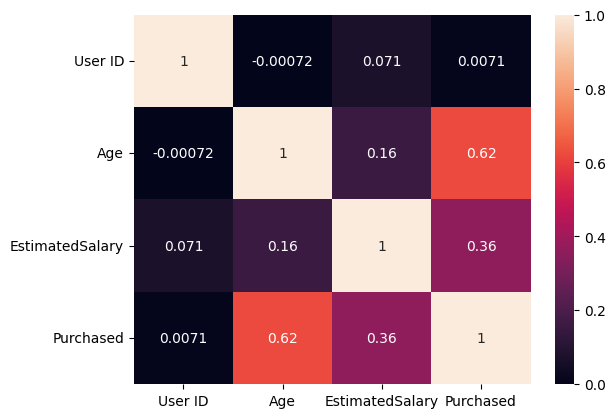

In [9]:
sns.heatmap(df.corr(numeric_only=True) , annot=True )

C:\Users\hdgn5\AppData\Local\Temp\ipykernel_15832\3798313832.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Purchased" , data=df , palette="Purples") ;


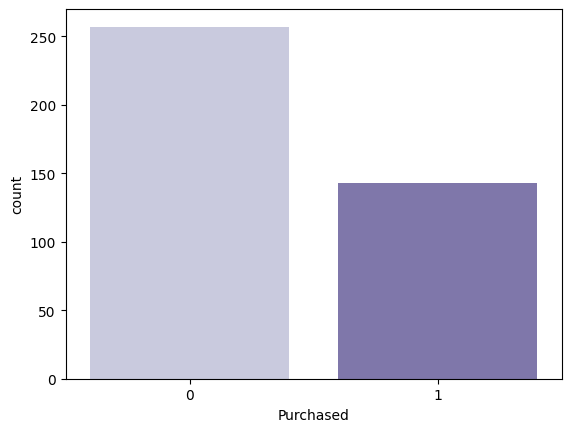

In [10]:
sns.countplot(x="Purchased" , data=df , palette="Purples") ;

In [11]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


* Genderin object olmasını değil de sayısal olmasını istiyorum

In [13]:
map_gender={
    "Male":1,
    "Female":0    
    }

df["Gender"] =df["Gender"].map(map_gender)

In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [15]:
df[["Gender","Purchased"]].value_counts()
# Cinsiyet 1 se ve almadıysa 130 
# Cinsiyet 0 sa ve almadıysa 127
# Cinsiyet 0 sa ve aldıysa 77
# Cinsiyet 1 se ve aldıysa 66

Gender  Purchased
1       0            130
0       0            127
        1             77
1       1             66
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

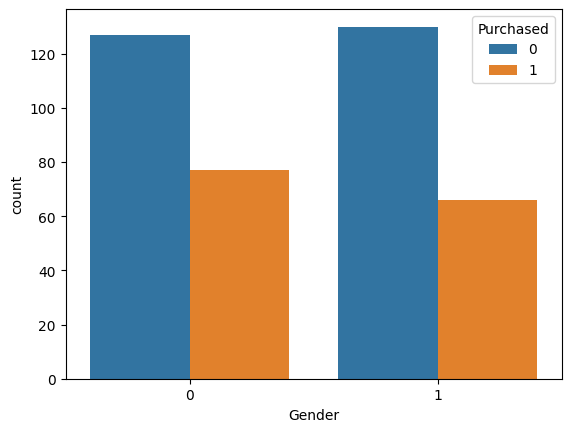

In [16]:
sns.countplot(x="Gender" ,data=df , hue="Purchased")

KeyboardInterrupt: 

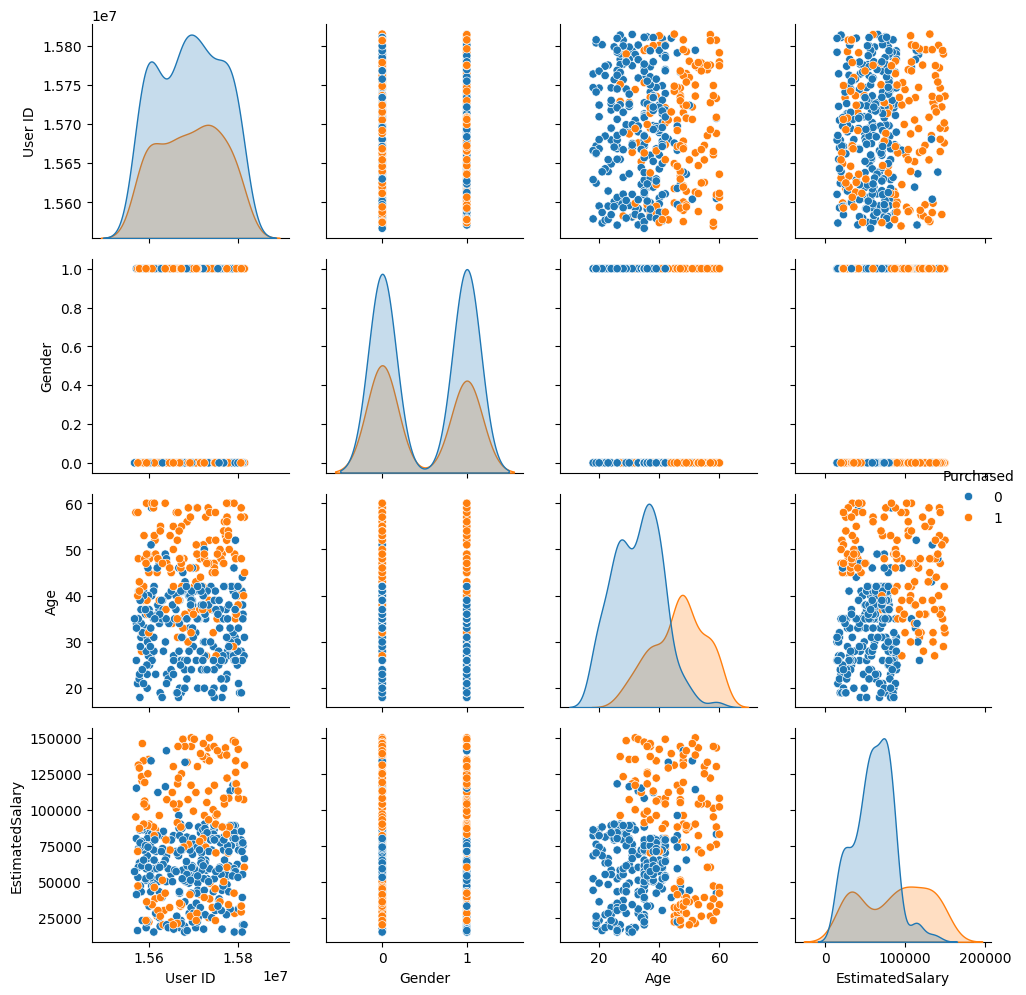

In [17]:
sns.pairplot(df , hue="Purchased")

* En iyi görselleştirme hangisiyse onu aldık

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

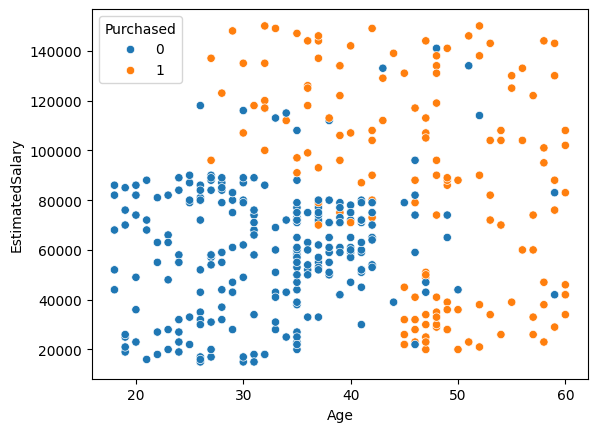

In [ ]:
sns.scatterplot(x="Age", y="EstimatedSalary" , data=df , hue="Purchased" )

# Train Test Split

In [ ]:
x = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
 test_size= 0.25, random_state = 9)

# Model

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred= knn.predict(scaled_X_test)

# Model Değerlendirme

In [ ]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , accuracy_score

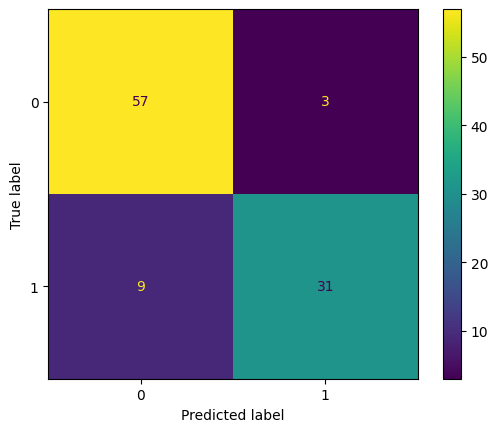

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn , scaled_X_test , y_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.91      0.78      0.84        40

    accuracy                           0.88       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.88      0.88      0.88       100



In [ ]:
hata_oranı=[]
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train,y_train)
    knn_pred = knn.predict(scaled_X_test)

    err =(1-accuracy_score(y_test , knn_pred))
    hata_oranı.append(err)

Text(0.5, 0, 'K Değeri')

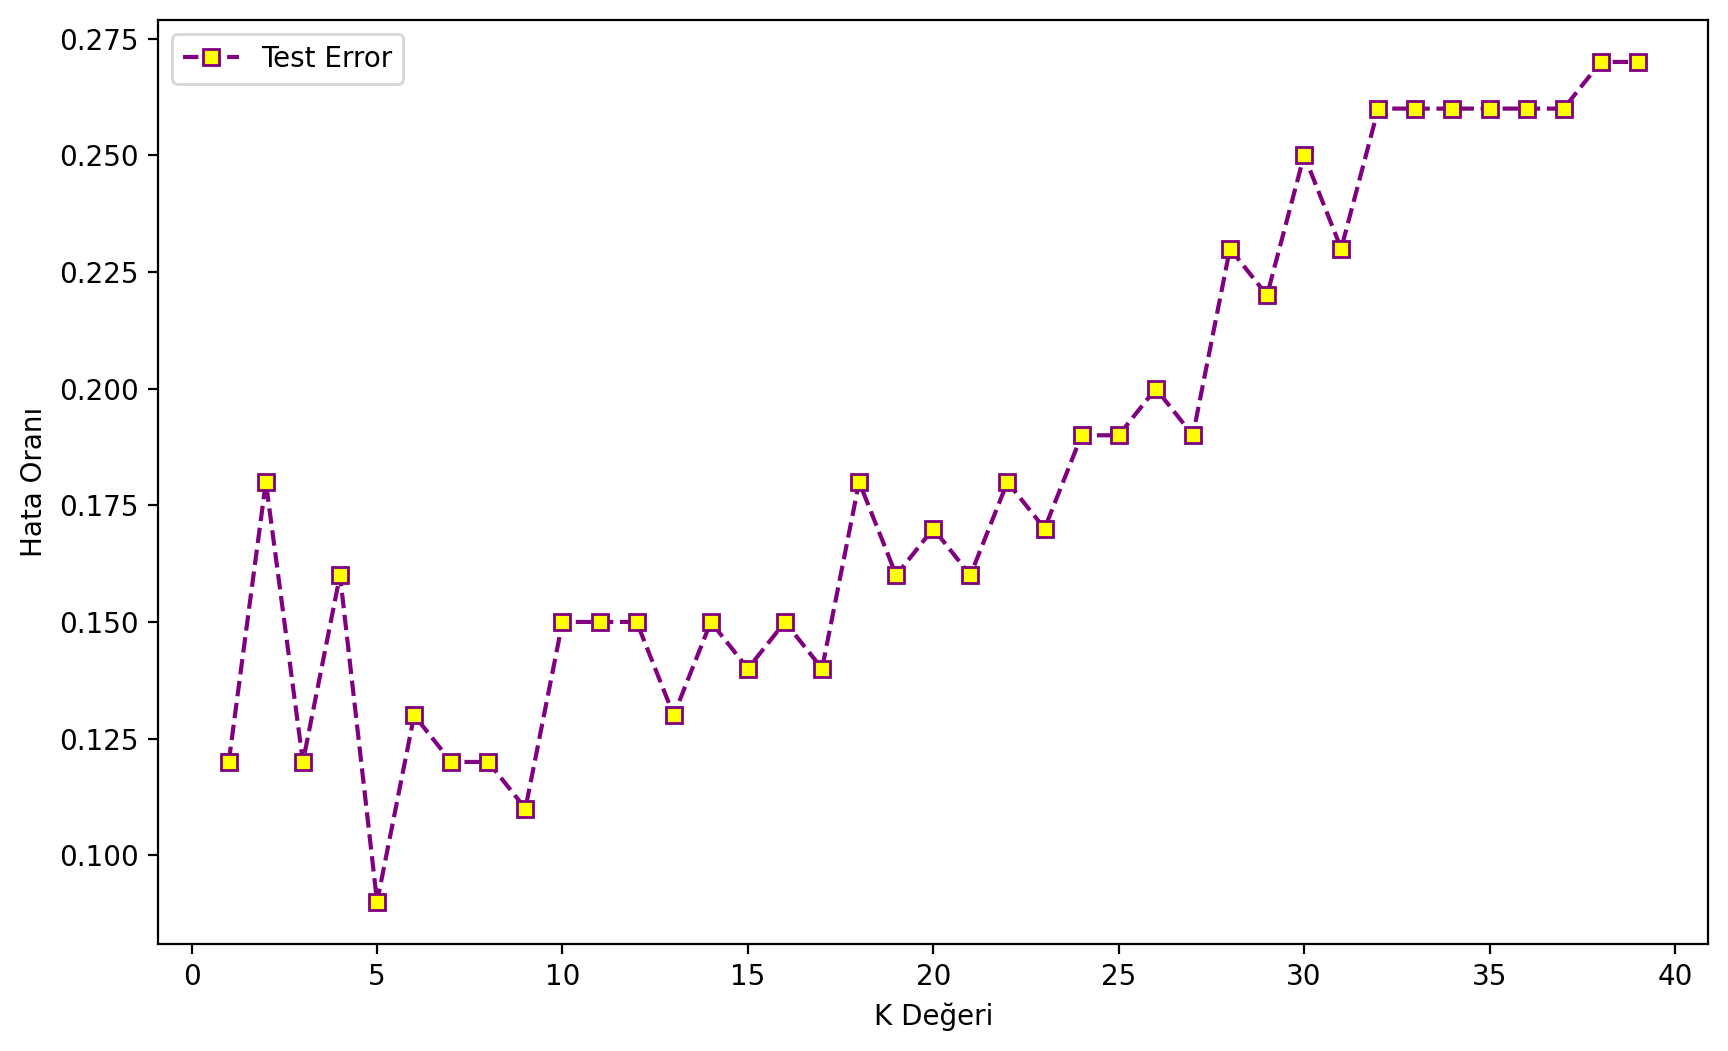

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,40),hata_oranı,color="purple", linestyle="dashed" ,
 marker="s" , markerfacecolor="yellow",label='Test Error')
plt.legend()
plt.ylabel('Hata Oranı')
plt.xlabel("K Değeri")

* En iyi değer 5 olarak gözüküyor

# Final Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train , y_train)
pred_knn =knn.predict(scaled_X_test)

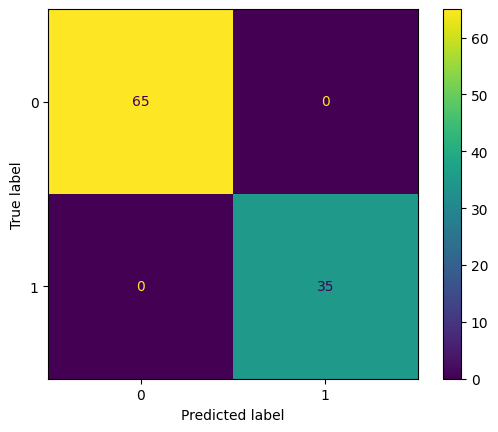

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn , scaled_X_test , pred_knn )

In [ ]:
print(classification_report(y_test , pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        60
           1       0.94      0.82      0.88        40

    accuracy                           0.91       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



* En iyi değeri 5 olarak yazdığımızda değerler bu şekilde çıkıyor